# CS412 - Machine Learning - 2021
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision Tree and k-NN approaches
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. Reserve 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the rest for development (learning your models). The official test data (10,000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier (decision tree and k-NN) with the Scikit library function calls to classify digits in the MNIST dataset.

## Software: 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

When you search for decision tree for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
#this cell can be skipped at the running time
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

X_train_size= X_train.shape
X_test_size= X_test.shape
#use size to reshaping and fitting into 1D numpy array
import numpy as np
#i used Traindata and Testdata because i did not want to change original dataset. Maybe orginal dataset will be use in future

trainData=np.reshape(X_train,(X_train_size[0],X_train_size[1]*X_train_size[2])).astype('float32')
testData=np.reshape(X_test,(X_test_size[0],X_test_size[1]*X_test_size[2])).astype('float32')


from sklearn.preprocessing import normalize
trainData = normalize(trainData)
testData = normalize(testData)

print("Shape of datas")
print("TrainData", trainData.shape)
print("TestData", testData.shape)

# Read data 
TrainDF=pd.DataFrame(trainData)
TrainDF['Labels']= Y_train


Shape of datas
TrainData (60000, 784)
TestData (10000, 784)


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

..

In [ ]:
#this cell can be skipped at the running
#print attribute names
print(TrainDF.columns)

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
            775,      776,      777,      778,      779,      780,      781,
            782,      783, 'Labels'],
      dtype='object', length=785)


In [ ]:
# print shape
print('Data Dimensionality: ')
print(TrainDF.shape)
import numpy as np



# print first 5 rows in your dataset
print('Head of Data: ')

print(TrainDF.head())



Data Dimensionality: 
(60000, 785)
Head of Data: 
     0    1    2    3    4    5    6  ...  778  779  780  781  782  783  Labels
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       5
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       4
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       1
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0       9

[5 rows x 785 columns]


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data


(train_x, val_x, train_y, val_y) = train_test_split(trainData,Y_train, test_size = 0.2, random_state = 20)

print(train_x.shape,train_y.shape)
print(val_x.shape,val_y.shape)

# Split 80-20
print("############### exstra ###############")
#exstra
#print(train_x)
#print(train_y)
#print(val_x)
#print(val_y)
#exstra

(48000, 784) (48000,)
(12000, 784) (12000,)
############### exstra ###############
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 7 0 ... 3 7 2]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 5 7 ... 8 1 4]


##5) Train decision tree and k-NN  classifiers on development data and do model selection using the validation data


* Train a decision tree (try  4 different meta-parameters, varying max_depth and min_samples_split. You should play with different values, maybe 10 or 20 for max-depth and 100 or 200 for min_samples_split) and a k-NN classifier (use k=3 and k=7, do not try other values) with the rest of the parameters set to default. 

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
# Train k-NN classifiers


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#min samples split default is 2 5 10
min_samples_split = [2,5,10]


for samples in min_samples_split:
  clf_min_samples_split = DecisionTreeClassifier(min_samples_split = samples, random_state = 0)
  clf_min_samples_split.fit(train_x,train_y)
# Evaluate on validation set
  y_pred = clf_min_samples_split.predict(val_x)
  val_acc = accuracy_score(val_y, y_pred)
  print("Accuracy Score for validation",val_acc)
  train_y_pred = clf_min_samples_split.predict(train_x)
  train_acc = accuracy_score(train_y, train_y_pred)
  print("Accuracy Score for train",train_acc)
# Report your results    

Accuracy Score for validation 0.8723333333333333
Accuracy Score for train 1.0
Accuracy Score for validation 0.8679166666666667
Accuracy Score for train 0.9826041666666666
Accuracy Score for validation 0.8690833333333333
Accuracy Score for train 0.9664166666666667


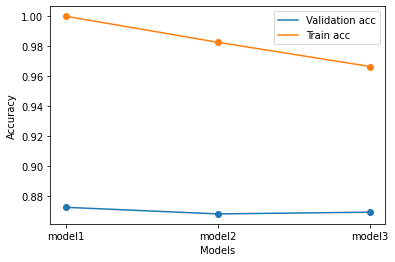

In [ ]:
  # Plot errors
  #i split plotting because calculating waste to much time
x_axis = ['model1', 'model2', 'model3']
VAL= [0.8723333333333333,0.8679166666666667,0.8690833333333333]
TRAIN= [1 ,0.9826041666666666, 0.9664166666666667]
plt.scatter(x_axis, VAL)
plt.scatter(x_axis, TRAIN)
plt.plot(x_axis, VAL, label = "Validation acc")
plt.plot(x_axis, TRAIN, label = "Train acc")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6) Test your trained classifiers on the Validation set
Test your trained classifiers on the validation set and print the accuracies.


In [ ]:
from sklearn.metrics import accuracy_score

# Use misclassification rate as error measure

clf = DecisionTreeClassifier(min_samples_split= 2,random_state= 0)
clf.fit(trainData,Y_train)




# test prediction using a decision tree with all default parameters and ..... min-split value 
y_pred1 = clf.predict(trainData)



# Report your accuracy
print("Accuracy Score", accuracy_score(Y_train,y_pred1))


# Report your results




Accuracy Score 1.0


## 7) Test your classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data



clf = DecisionTreeClassifier(min_samples_split= 2,random_state= 0)
clf.fit(trainData,Y_train)




# Predict
y_pred2 = clf.predict(testData)



# Report your result
print("Accuracy Score", accuracy_score(Y_test,y_pred2))






Accuracy Score 0.8813


##8) Report Your Results




Classifying grayscale picture by using decision tree.

We had dataset from mnist from keras. We reduced it to 1 dimensional from 2-d.
So we noramalized it. After these procesess. We splitted it Validation Train and test. We used different function like sample_split or shuffle.


Accuracy Score for validation 0.8723333333333333

Accuracy Score for train 1.0

Accuracy Score for validation 0.8679166666666667

Accuracy Score for train 0.9826041666666666

Accuracy Score for validation 0.8690833333333333

Accuracy Score for train 0.9664166666666667


 

I think this processes going slow.


 I did not do something which is exstra.

